<a href="https://colab.research.google.com/github/TenzinYangzom158/Machine-Learning---01/blob/main/Lab2_DataPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2: Implement the data preprocessing techniques and KNN

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

To create a model that can predict the age of a possum, given a set of features describing it.

In [3]:
#Importing data and displaying the first 10 samples

data = pd.read_csv("possum.csv")
data.head(10)

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
5,6,1,Vic,f,1.0,93.1,54.8,90.5,35.5,73.2,53.6,14.2,30.0,32.0
6,7,1,Vic,m,2.0,95.3,58.2,89.5,36.0,71.5,52.0,14.2,30.0,34.5
7,8,1,Vic,f,6.0,94.8,57.6,91.0,37.0,72.7,53.9,14.5,29.0,34.0
8,9,1,Vic,f,9.0,93.4,56.3,91.5,37.0,72.4,52.9,15.5,28.0,33.0
9,10,1,Vic,f,6.0,91.8,58.0,89.5,37.5,70.9,53.4,14.4,27.5,32.0


### Null Values

In [4]:
data.isna().sum()

case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [5]:
# Filling missing values with average

data = data.fillna(data.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
data.isna().sum()

case        0
site        0
Pop         0
sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [8]:
data.shape

(104, 14)

## Numerical Data
## Minimum, Maximum and Range

In [9]:
data.min()

case           1
site           1
Pop          Vic
sex            f
age          1.0
hdlngth     82.5
skullw      50.0
totlngth    75.0
taill       32.0
footlgth    60.3
earconch    40.3
eye         12.8
chest       22.0
belly       25.0
dtype: object

In [10]:
data.max()

case          104
site            7
Pop         other
sex             m
age           9.0
hdlngth     103.1
skullw       68.6
totlngth     96.5
taill        43.0
footlgth     77.9
earconch     56.2
eye          17.8
chest        32.0
belly        40.0
dtype: object

In [12]:
data.dtypes

case          int64
site          int64
Pop          object
sex          object
age         float64
hdlngth     float64
skullw      float64
totlngth    float64
taill       float64
footlgth    float64
earconch    float64
eye         float64
chest       float64
belly       float64
dtype: object

In [13]:
#Getting range of all numeric columns

num_data = data.select_dtypes(include = np.number)
num_data.max() - num_data.min()

case        103.0
site          6.0
age           8.0
hdlngth      20.6
skullw       18.6
totlngth     21.5
taill        11.0
footlgth     17.6
earconch     15.9
eye           5.0
chest        10.0
belly        15.0
dtype: float64

### Quartiles and Percentile

In [14]:
#First quartile
num_data.quantile(0.25)

case        26.750
site         1.000
age          2.750
hdlngth     90.675
skullw      54.975
totlngth    84.000
taill       35.875
footlgth    64.650
earconch    44.800
eye         14.400
chest       25.500
belly       31.000
Name: 0.25, dtype: float64

In [15]:
#Second Quartile / Median
num_data.quantile(0.5)

case        52.50
site         3.00
age          3.00
hdlngth     92.80
skullw      56.35
totlngth    88.00
taill       37.00
footlgth    68.10
earconch    46.80
eye         14.90
chest       27.00
belly       32.50
Name: 0.5, dtype: float64

In [16]:
#Third Quartile
num_data.quantile(0.75)

case        78.250
site         6.000
age          5.000
hdlngth     94.725
skullw      58.100
totlngth    90.000
taill       38.000
footlgth    72.500
earconch    52.000
eye         15.725
chest       28.000
belly       34.125
Name: 0.75, dtype: float64

In [17]:
# Interquartile range
num_data.quantile(0.75) - num_data.quantile(0.25)

case        51.500
site         5.000
age          2.250
hdlngth      4.050
skullw       3.125
totlngth     6.000
taill        2.125
footlgth     7.850
earconch     7.200
eye          1.325
chest        2.500
belly        3.125
dtype: float64

In [18]:
# Getting the 60th percentile for each column

pd.Series(np.percentile(num_data, 60, axis = 0), index = num_data.columns)

case        62.80
site         5.00
age          4.00
hdlngth     93.38
skullw      57.18
totlngth    89.00
taill       38.00
footlgth    70.54
earconch    50.60
eye         15.10
chest       28.00
belly       33.00
dtype: float64

## Outlier Analysis
Plotting graphs to identify outliers

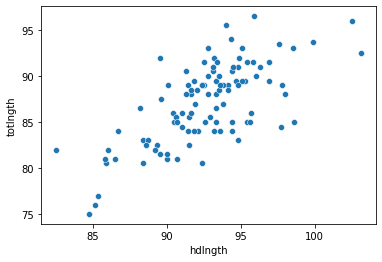

In [19]:
#Scatterplot showing how total length of possums vary with their head lengths
sb.scatterplot(data = data, x = "hdlngth", y = "totlngth")

From the plot above, possums with head length outside the range (85,100) can be considered as outliers. Replacing outliers with mean values:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


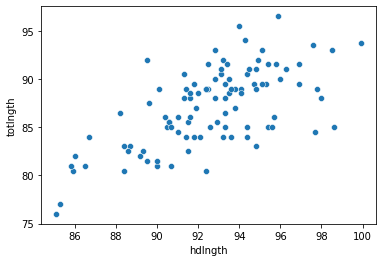

In [20]:
mean = data.loc[data["hdlngth"] < 100].mean()
data["hdlngth"] = data["hdlngth"].mask(data["hdlngth"] > 100, mean)

mean = data.loc[data["hdlngth"] > 85].mean()
data["hdlngth"] = data["hdlngth"].mask(data["hdlngth"] < 85, mean)

sb.scatterplot(data = data, x = "hdlngth", y = "totlngth")

# Categorical Data
In our data, the features "Pop", "site" and "sex" represent categorical data. Since our model is going to predict the age of a possum, we will have a look at the distribution of age over different categories.

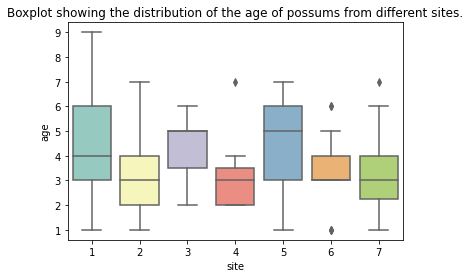

In [21]:
sb.boxplot(x="site", y="age", data=data ,palette="Set3"); 
plt.title("Boxplot showing the distribution of the age of possums from different sites.");

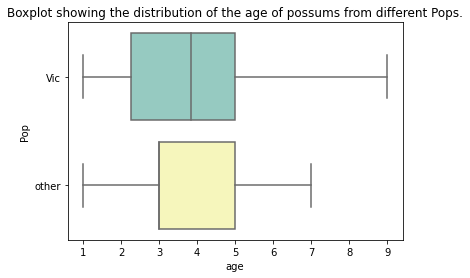

In [22]:
sb.boxplot(x = "age", y = "Pop", data = data, palette = "Set3");
plt.title("Boxplot showing the distribution of the age of possums from different Pops.");

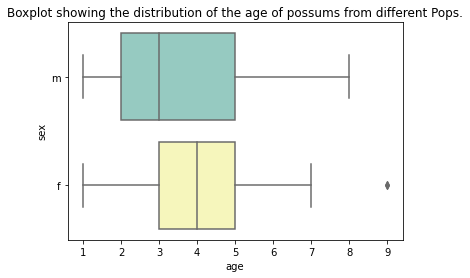

In [23]:
sb.boxplot(x = "age", y = "sex", data = data, palette = "Set3");
plt.title("Boxplot showing the distribution of the age of possums from different Pops.");

# Categorical Findings
*   Median age of male possums is lesser than that of females.
*   Vic has much more variation in age.

Since the site feature contains categorical data, we need not find the correlation between site and age of the possums. Hence, below we will convert all entries in the site column to string datatype.

In [24]:
data['site'] = data['site'].apply(lambda x:str(x))
data.info() #change site into string

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    object 
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       104 non-null    float64
 5   hdlngth   100 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  104 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(1), object(3)
memory usage: 11.5+ KB


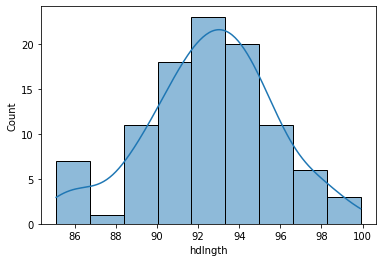

In [25]:
sb.histplot(data = data, x = "hdlngth", kde = True);

# We can see that majority of possums have their head lengths in range 90-96

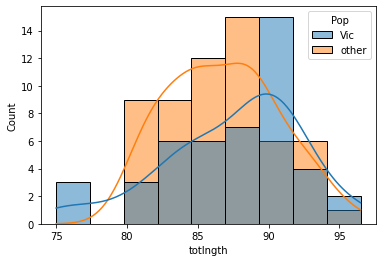

In [26]:
sb.histplot(data = data, x = "totlngth", hue = "Pop", kde = True)
# Hence, the median total length of Victorian possums is more.

## Correlation between numerical features and age
To get an idea about the correlation between numerical features and age, we'll be using a heatmap

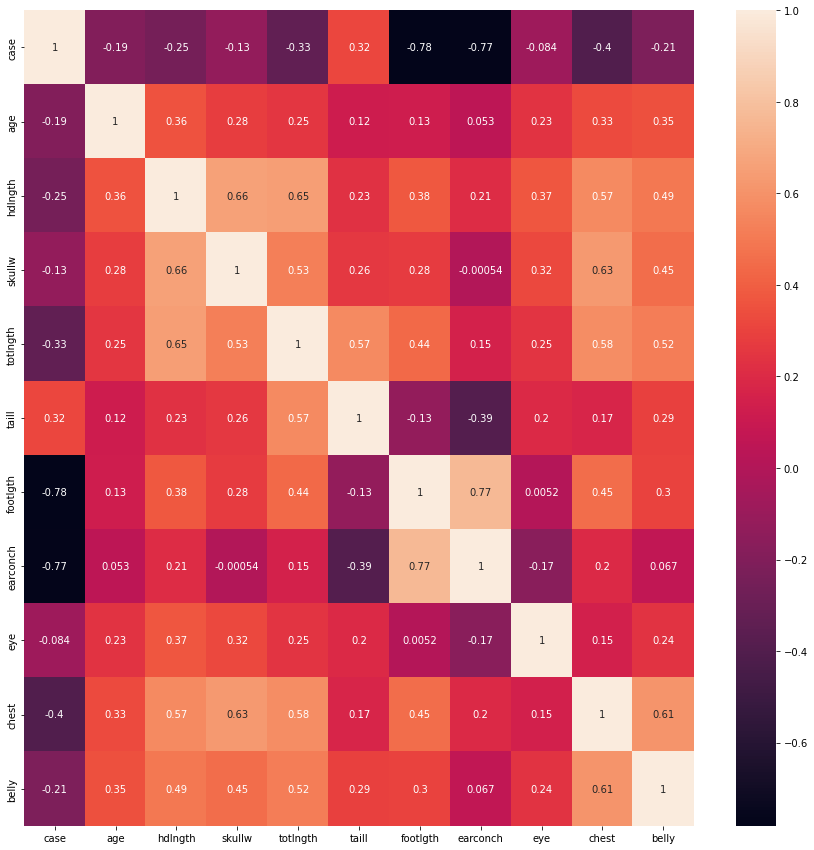

In [27]:
fig,ax = plt.subplots(figsize=(15,15))
sb.heatmap(data.corr(),annot=True)
plt.show()

From the heat map, it is evident that the age of the possum has the highest correlation with the belly size while its has th lowest correlation with earconch (we ignore the "case" column as it is used as a primary key).

Moreover, since none of the features have significantly low correlation with age, we cannot discard any of them.

In [28]:
# Lets separate our numerical and categorical columns

cat_cols = ['site', 'Pop', 'sex']
num_cols = list(set(data.columns).difference(set(cat_cols)))
num_cols.pop()
num_cols

['totlngth',
 'hdlngth',
 'case',
 'taill',
 'earconch',
 'belly',
 'age',
 'chest',
 'footlgth',
 'skullw']

# Handling missing data
Since there is missing data in only three entries (rows), we can simply drop them as the effect on our predicitions will be really low.

In [29]:
data.dropna(axis=0,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      100 non-null    int64  
 1   site      100 non-null    object 
 2   Pop       100 non-null    object 
 3   sex       100 non-null    object 
 4   age       100 non-null    float64
 5   hdlngth   100 non-null    float64
 6   skullw    100 non-null    float64
 7   totlngth  100 non-null    float64
 8   taill     100 non-null    float64
 9   footlgth  100 non-null    float64
 10  earconch  100 non-null    float64
 11  eye       100 non-null    float64
 12  chest     100 non-null    float64
 13  belly     100 non-null    float64
dtypes: float64(10), int64(1), object(3)
memory usage: 11.7+ KB


## Linear Regression Model
Objective: To create a model that predicts the age of a possum given a set of features.

In [30]:
X = data
X = X.drop('case', axis = 1)
X = X.drop('age', axis = 1)
y = data['age']
X.columns

Index(['site', 'Pop', 'sex', 'hdlngth', 'skullw', 'totlngth', 'taill',
       'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')

In [31]:
#One-Hot encoding to make use of the categorical data possible
X = pd.get_dummies(X)
X

,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,site_1,site_2,site_3,site_4,site_5,site_6,site_7,Pop_Vic,Pop_other,sex_f,sex_m
0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0,1,0,0,0,0,0,0,1,0,0,1
1,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0,1,0,0,0,0,0,0,1,0,1,0
2,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0,1,0,0,0,0,0,0,1,0,1,0
3,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0,1,0,0,0,0,0,0,1,0,1,0
4,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0,1,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0,0,0,0,0,0,0,1,0,1,0,1
100,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0,0,0,0,0,0,0,1,0,1,0,1
101,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0,0,0,0,0,0,0,1,0,1,1,0
102,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0,0,0,0,0,0,0,1,0,1,0,1


In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)

In [33]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [34]:
print(f'RMSE:{np.sqrt(mean_squared_error(y_test, predictions))}')
print(f'Standard Deviation of Age:{data.age.std()}')

RMSE:1.7836900949555288
Standard Deviation of Age:1.8654697942638705
